# Exam 2022

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm 
from scipy import stats
import itertools
from iminuit import Minuit   
from scipy.optimize import minimize
import sys  
from importlib import reload
from scipy import interpolate
import copy
import pandas as pd
import math

# Standard libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ultranest
from ultranest.plot import cornerplot
from ultranest.plot import PredictionBand


# external libraries
sys.path.append('../') 
import AdvAppStatFunctions as aas

# setting for plotting
from matplotlib.patches import ConnectionPatch
import seaborn as sns
plt.style.use('seaborn-white')
sns.set_style('white', {'legend.frameon':True})
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
sns.set_palette("colorblind")
color = sns.color_palette("colorblind")

## Problem 1

Use the separate data from first, second, and third columns to
identify the function on the previous slide from which each was
generated. Find the best-fit values and uncertainties on those
values for the distribution using a likelihood method (either
bayesian or maximum likelihood is fine)

E.g. if f(x)=sin(ax+b)*exp(-x+c)+x/k! were one of the functions, then find the
best-fit values for a, b, c, and k and their uncertainties

• Degeneracies exist, e.g. sin(x)=cos(a+x), which can produce functionally
identical data distributions

• Any function, with associated best-fit parameters which is statistically
compatible with the data in the files will be accepted as a proper solution. Only
one solution is necessary, but needs to be justified as statistically compatible.

• The first and second columns have artificially truncated ranges

• First column is only sampled in the independent variable from 20 to 27

• Second column is only sampled in the independent variable from -1 to 1

### Parsing data

In [15]:
data_prob1 = np.genfromtxt('Exam_2022_Prob1.txt')
data_c1, data_c2, data_c3 = data_prob1[:,0], data_prob1[:,1], data_prob1[:,2]

### Fit functions

In [16]:
def fit_func1(x, a, b, c):
    func = np.sin(a*x) + c*np.exp(b*x)+1
    norm = (np.cos(20*a)-np.cos(27*a))/ a + np.exp(20*b)*(np.exp(7*b)-1)*c/b + 7
    return func/norm

def fit_func2(x, alpha, beta):
    func = 1 + alpha*x + beta*x**2
    norm = (2/3*(beta+3)) 
    return func/norm
    #return 1/(x+5)*np.sin(a*x)

def fit_func3(x, lamb):
    func = scipy.stats.poisson.pmf(x, lamb)
    return func

In [17]:
fit_c1_f1 = aas.llh_fit(data_c1, fit_func1, [4, -0.3, 5000], ['a', 'b', 'c'])
fit_c2_f2 = aas.llh_fit(data_c2, fit_func2, [0.5, 2], ['alpha', 'beta'])
fit_c3_f3 = aas.llh_fit(data_c3, fit_func3, [5], ['lambda'])

In [18]:
x1 = np.linspace(min(data_c1), max(data_c1), 1000)
c1_f1 = fit_func1(x1, *fit_c1_f1[0])

x2 = np.linspace(min(data_c2), max(data_c2), 1000)
c2_f2 = fit_func2(x2, *fit_c2_f2[0])

x3 = np.linspace(min(data_c3), max(data_c3), 1000)
c3_f3 = fit_func3(np.floor(x3+0.5), fit_c3_f3[0])

### Plotting result

In [19]:
reload(aas);

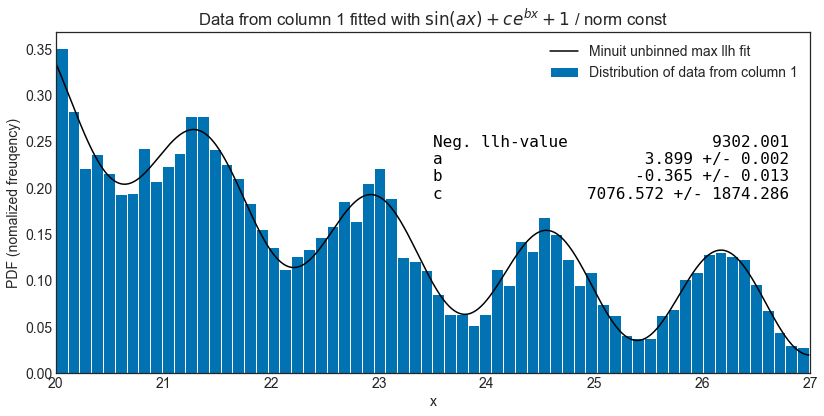

In [20]:
fig, ax = plt.subplots(figsize=(12,6)) 

aas.plot_hist(data_c1, min(data_c1), max(data_c1), N_bins=64, ax=ax, xlabel='x', ylabel='PDF (nomalized freuqency)', 
              histlabel='Distribution of data from column 1', color= color[0])
ax.plot(x1, c1_f1, color='black', label='Minuit unbinned max llh fit')
ax.legend()
ax.set(title=r'Data from column 1 fitted with $\sin(ax) + c e^{bx}+1$ / norm const', xlim=(20,27))
aas.llh_fit_text(*fit_c1_f1, ['a', 'b', 'c'], ax=ax, d_xy=[0.5, 0.7])
fig.tight_layout();

In [21]:
chi2, prob = aas.chi2_hist(data_c1, fit_func1, fit_c1_f1[0], 70)

The Chi2 is: 58.3691 with a p-value of: 0.7648


ValueError: too many values to unpack (expected 2)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6)) 
aas.plot_hist(data_c2, min(data_c2), max(data_c2), N_bins=70, ax=ax, xlabel='x', ylabel='PDF (nomalized freuqency)', 
              histlabel='Distribution of data from column 2', color= color[1])
ax.plot(x2, c2_f2, color='black', label='Minuit unbinned max llh fit')
ax.legend()
ax.set(title=r'Data from column 2 fitted with $1+ax+bx^2$ / norm const', xlim=(-1,1))
aas.llh_fit_text(*fit_c2_f2, ['a', 'b'], ax=ax, d_xy=[0.17, 0.75])
fig.tight_layout();

In [ ]:
chi2, prob = chi2, prob = aas.chi2_hist(data_c2, fit_func2, fit_c2_f2[0], 70)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6)) 
aas.plot_hist(data_c3, min(data_c3), max(data_c3), N_bins=np.arange(min(data_c3), max(data_c3))-0.5, ax=ax, xlabel='x', ylabel='PDF (nomalized freuqency)', 
              histlabel='Distribution of data from column 3', color= color[2])
ax.plot(x3, c3_f3, color='black', label='Minuit unbinned max llh fit')
ax.legend()
ax.set(title=r'Data from column 3 fitted with a Poisson distribution', xlim=(0, 21),
      xticks=np.arange(min(data_c3), max(data_c3)+1), xticklabels=np.arange(min(data_c3), max(data_c3)+1))
aas.llh_fit_text(*fit_c3_f3, ['lambda'], ax=ax, d_xy=[0.58, 0.74])
fig.tight_layout();

In [ ]:
chi2, prob = aas.chi2_hist(data_c3, fit_func3, fit_c3_f3[0], 20)

Thoughts:

First plot: periodic element

Second plot: parabolic element

Third plot: PMF, probabily Poisson

# Problem 2a

Quantify whether the data is spherically isotropically
distributed

### Parsing data

In [ ]:
data_prob2 = np.genfromtxt('Exam_2022_Problem2.txt', skip_header=1)
azi = data_prob2[:,0]
zen = data_prob2[:,1]

### Plotting the data 

In [ ]:
# Make figure with right projection
fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection': 'mollweide'})

# Background and gridlines
ax.set_facecolor('gainsboro')
ax.grid(color='white')
# Meridian - zenith angle from 0rad to pi (0deg to 180 deg) -pi/2 so instead goes from -pi to pi
meridian = np.stack([np.zeros(100), np.linspace(0,np.pi,100) - np.pi/2], axis=1)
# Equator from 0 rad to 2pi - pi
equator = np.stack([np.linspace(0,2*np.pi,100) - np.pi, np.zeros(100)], axis=1)
# Display it
ax.plot(equator[:,0], equator[:,1], lw=1, color='w')
ax.plot(meridian[:,0], meridian[:,1], lw=1, color='w')

# Plot the data
ax.scatter(azi-np.pi, -zen+np.pi/2, marker='*', color='k', s=50, zorder=2)

# Title
ax.set_title('Visualization of Data on Mollweide Projection', fontsize=15)

#if SaveFig:
#    plt.tight_layout()
#    plt.savefig('Plots/2a_1.pdf')

plt.show()

### Sample isotrpoic data

Isotropic data is uniformly distributed both in the azimuth angle with range (0,2pi) and in cos(zenith angle) with range (-1,1). We will randomly sample as many points as is in the data set from these distributions.

In [ ]:
# Sample from distributions
np.random.seed(1)
N_points = len(data_prob2)
MC_azi = np.random.uniform(low=0, high=2*np.pi, size=N_points)
MC_cos_zen = np.random.uniform(low=-1, high=1, size=N_points)
MC_zen = np.arccos(MC_cos_zen)

In [ ]:
# Make figure with right projection
fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection': 'mollweide'})

# Background and gridlines
ax.set_facecolor('gainsboro')
ax.grid(color='white')
# Meridian - zenith angle from 0rad to pi (0deg to 180 deg) -pi/2 so instead goes from -pi to pi
meridian = np.stack([np.zeros(100), np.linspace(0,np.pi,100) - np.pi/2], axis=1)
# Equator from 0 rad to 2pi - pi
equator = np.stack([np.linspace(0,2*np.pi,100) - np.pi, np.zeros(100)], axis=1)
# Display it
ax.plot(equator[:,0], equator[:,1], lw=1, color='w')
ax.plot(meridian[:,0], meridian[:,1], lw=1, color='w')

# Plot the data
ax.scatter(azi-np.pi, -zen+np.pi/2, marker='*', color='k', s=50, zorder=2, label='Data')

# Plot the simulated sample
ax.scatter(MC_azi-np.pi, -MC_zen+np.pi/2, marker='*', color='r', s=50, zorder=2, 
           label='Simulated Isotropic Data')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, fancybox=True, prop={'size':15})

#if SaveFig:
#    plt.tight_layout()
#    plt.savefig('Plots/2a_2.pdf')
    
plt.show()

### Two Point Auto-Correlation Function

We now calculate the two point auto-correlation function, so we can compare them with a KS-test later.

In [ ]:
# Define a function that calculate 2pointcorr
def two_point_func(azim_arr, zeni_arr):
    
    # Define number of points
    N_tot = len(azim_arr)
    
    # Convert each point into cartesian coordinates (get unit vectors: r=1)
    r = 1
    Nx_arr = r * np.cos(azim_arr) * np.sin(zeni_arr)
    Ny_arr = r * np.sin(azim_arr) * np.sin(zeni_arr)
    Nz_arr = r * np.cos(zeni_arr)
    
    #Defining the range of cos phi's (x-axis)
    N_bins = 50
    cos_phi_bins = np.linspace(-1, 1, N_bins)

    # Array to store angular distance pairs, i.e. all cos_phi_ij
    cos_phi_ij_arr = []
    
    # Loop over N_tot (outer sum)
    for i in range(0,N_tot):
        # Loop over i-1 (inner sum)
        for j in range(0,i):
            
            # Compute the angular distance cos(phi_ij) as the dot product of N_i dot N_j
            cos_phi_ij = Nx_arr[i]*Nx_arr[j] + Ny_arr[i]*Ny_arr[j] + Nz_arr[i]*Nz_arr[j]
            
            # Store it
            cos_phi_ij_arr.append(cos_phi_ij)

    
    # Emmpty array to store two point auto correlation function (y-values)
    two_point_arr = []
    
    # Loop over our cos phi bins (x-values)
    for i in range(N_bins):
        
        # =1 for x>= 0, =0 for x<0
        heaviside = np.heaviside(cos_phi_ij_arr - cos_phi_bins[i], 0)
        two_point = ( 2/(N_tot*(N_tot-1)) ) * np.sum( heaviside )
        
        # Store it
        two_point_arr.append(two_point)
    
    # Calculate the isotropic prediction
    iso_pred = (1/2)*(1-cos_phi_bins)
    
    return cos_phi_bins, two_point_arr, iso_pred

In [ ]:
# Use the function
x, y, y_pred = two_point_func(azi, zen)
MC_x, MC_y, MC_y_pred = two_point_func(MC_azi, MC_zen)

### KS-test

In [ ]:
# Define function
def ks_test(dataA, dataB):
    return np.max( np.abs(dataA-dataB) )

ks_H0 = ks_test(y, y_pred)
MC_ks_H0 = ks_test(MC_y, MC_y_pred)
print(ks_H0, MC_ks_H0)

In [ ]:
# Plot the KS test visually ------

# Create fig
fig, ax = plt.subplots(nrows=2, figsize=(12,8), sharex=True, 
                       gridspec_kw = {'height_ratios': [1.5, 0.4], 'hspace': 0.1})

for i in range(2):
    ax[i].set_facecolor('gainsboro')
    ax[i].grid(color='white')

# Plot the two functions
ax[0].plot(x, y, color='k', label='Cumulative Auto-Correlation of Data')
ax[0].plot(x, y_pred, color='r', label='Predicted Cumulative Auto-Correlation for Isotropic Data')
ax[0].legend(prop={'size':15})

# Plot the residuals in subplot below
resi = y_pred-y
ax[1].plot(x, resi, color='k', label='Residual (y_pred - y)')
ax[1].hlines(0, x[0], x[-1], linestyle='dashed', color='r')
ax[1].legend(prop={'size':15})

# ---------- Plot zoom -------------
# Create extra axis
ax1 = fig.add_axes([0.18, 0.35, 0.27, 0.25]) # add_axes([x0, y0, width, height])
ax1.set_facecolor('gainsboro')
ax1.grid(color='white')
  
# Plot again
ax1.plot(x, y, color='k')
ax1.plot(x, y_pred ,color='r')

# Get supremum index
index = np.argmax(abs(resi))
ks_H0 = ks_test(y, y_pred)

# Adjust limits
if resi[index] > 0: # y_pred is highest at supremum
    ymin, ymax = y[index] - resi[index], y_pred[index] + resi[index]
            
if resi[index] < 0: # y is highest at supremum
    ymin, ymax = y_pred[index] + resi[index], y[index] - resi[index]
        
xmin, xmax = x[index] - 0.05 * x[index], x[index] + 0.05 * x[index]
        
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

# Mark supremum
supremum = ConnectionPatch(xyA=(x[index], y_pred[index]), xyB=(x[index], y[index]), coordsA=ax1.transData, 
                           arrowstyle='<->', color='k')
fig.add_artist(supremum)
ax1.set_title(f'KS = {ks_H0:.4f}', color='k', fontsize=14)

# Add zoom lines
con1 = ConnectionPatch(xyA=(xmin, ymin), coordsA=ax[0].transData, xyB=(xmax, ymin), coordsB=ax1.transData, alpha=0.5)
con2 = ConnectionPatch(xyA=(xmax, ymax), coordsA=ax[0].transData, xyB=(xmax,ymax), coordsB=ax1.transData, alpha=0.5)

sq1 = ConnectionPatch(xyA=(xmin, ymin), xyB=(xmax, ymin), coordsA=ax[0].transData, alpha=0.5)
sq2 = ConnectionPatch(xyA=(xmin, ymax), xyB=(xmax, ymax), coordsA=ax[0].transData, alpha=0.5)
sq3 = ConnectionPatch(xyA=(xmin, ymin), xyB=(xmin, ymax), coordsA=ax[0].transData, alpha=0.5)
sq4 = ConnectionPatch(xyA=(xmax, ymin), xyB=(xmax, ymax), coordsA=ax[0].transData, alpha=0.5)

fig.add_artist(con1)
fig.add_artist(con2)
fig.add_artist(sq1)
fig.add_artist(sq2)
fig.add_artist(sq3)
fig.add_artist(sq4)
# ----------------------------------

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].tick_params(axis='both', which='minor', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='minor', labelsize=15)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)

ax[1].set_xlabel(r'$cos(\phi)$', fontsize=20)
ax[0].set_ylabel(r'$\mathcal{C}(cos(\phi))$', fontsize=20)

ax[0].set_title('KS Test of Cumulative Two Point Auto-Correlation Function')

#if SaveFig:
#    plt.tight_layout()
#    plt.savefig('Plots/2a_3.pdf')
    
plt.show()

### P-value from pseudo-experiments

The idea is now to simulate many isotropiccaly distributed data, and find their ks value by comparing it to the predicted isotropic. We can then calculate a p value from the distribution of ks-value, that tells us the likelihood of obtaining the KS test of 0.0163 that we got.

In [ ]:
# Define a function to simulate isotropic data
def sample_isotropic(seed, N_points=len(data_prob2)):
    
    # Set seed
    np.random.seed(seed)
    
    # Sample from distributions
    MC_azim = np.random.uniform(low=0, high=2*np.pi, size=N_points)
    MC_cos_zeni = np.random.uniform(low=-1, high=1, size=N_points)
    MC_zeni = np.arccos(MC_cos_zeni)
    
    return MC_azim, MC_zeni

# Define a function that calculates the KS_test for many data sets
def sample_KS(N_samples, N_points):
    
    # Array to store KS val in
    KS_arr = []
    
    # Loop over samples
    for i in tqdm(range(N_samples)):
    
        # Produce sample of isotropic data
        MC_azim, MC_zeni = sample_isotropic(i*100, N_points)
        
        # Get two point correlation func
        x, y, y_pred = two_point_func(MC_azim, MC_zeni)
        
        # Get KS val
        KS_val = np.max( np.abs(y_pred-y) )
        KS_arr.append(KS_val)
        
    return KS_arr

In [ ]:
# We produce 5000 experiments
N_experiments = 5000
KS_experiments = sample_KS(N_experiments, len(azi))

In [ ]:
# Calculate the p-value (integrating number of events above cut divided by events below)
def compute_p_val(crit_val, sample):
    """
    crit_val = the critical val to compute p from
    sample = the data
    """
    
    return np.sum(sample >= crit_val) / len(sample)

p_iso = compute_p_val(ks_H0, KS_experiments)
print(f'p-value for isotropic: {p_iso}')

In [ ]:
# Create figure to demonstrate the finding of the p-value
fig, ax = plt.subplots(figsize=(12,6))
#ax.set_facecolor('gainsboro')
#ax.grid(color='white')

# Plot distribution of KS-values
bins_arr = np.arange(0,0.035,0.0005)
ax.hist(KS_experiments, color=color[0], ec='k', alpha=0.5, bins=100, zorder=2,
        label=f'KS values from pseudoexperiments')

# Plot the cut
ax.vlines(ks_H0, 0, 350, color='k', linewidth=3, zorder=3,
          label=f'Cut at KS-value {ks_H0:.4f} obtained from data')

# Display the pvalue and other specs
d = {r'Entries:': len(KS_experiments),
     r'Median :': np.median(KS_experiments),
     r'Std    :': np.std(KS_experiments)
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.72, 0.8, text, ax, fontsize=17, color='red')
d = {r'p value:': p_iso,
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.72, 0.6, text, ax, fontsize=17, color='k')

plt.ylim(0,350)
ax.legend(prop={'size':15})
ax.set_xlabel('KS value', fontsize=18)
ax.set_ylabel('Number of Samples', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#if SaveFig:
#    plt.tight_layout()
#    plt.savefig('Plots/2a_4.pdf')
    
plt.show()

# Problem 2b

Test whether the data fits the two following alternative
hypotheses better than the isotropic hypothesis:

• Hypothesis A: That 20% of the total sample is uniformly distributed
in azimuth over the range {0.225π, 0.725π} and uniformly distributed
in zenith over the range {0.30π, 1π}, and the remaining 80% is fully
isotropic

• Hypothesis B: That 15% of the total sample is uniformly distributed
in azimuth over the range {0π, 1π} and uniformly distributed in zenith
over the range {0.5π, 1π}, and the remaining 85% is fully isotropic.

In [ ]:
# Define a function to simulate data from hypothesis A
def sample_HA(seed, N_points=len(data_prob2)):
    
    # Set seed
    np.random.seed(seed)
    
    # Get number of points to sample uniformly in specified range
    N_uniform = int(0.2 * N_points)
    
    # Define uniform range
    uni_azim_range = (0.225*np.pi, 0.725*np.pi)
    uni_zeni_range = (0.30*np.pi, 1*np.pi)
    
    # Sample from uniform distributions within range
    uni_azim = np.random.uniform(*uni_azim_range, size=N_uniform)
    uni_zeni = np.random.uniform(*uni_zeni_range, size=N_uniform)
    
    # Sample the rest isotropically
    iso_azim = np.random.uniform(low=0, high=2*np.pi, size=N_points-N_uniform)
    iso_cos_zeni = np.random.uniform(low=-1, high=1, size=N_points-N_uniform)
    iso_zeni = np.arccos(iso_cos_zeni)
    
    # Concatenate arrays
    MC_azim = np.concatenate([uni_azim, iso_azim])
    MC_zeni = np.concatenate([uni_zeni, iso_zeni])
    
    return MC_azim, MC_zeni

# Define a function to simulate data from hypothesis B
def sample_HB(seed, N_points=len(data_prob2)):
    
    # Set seed
    np.random.seed(seed)
    
    # Get number of points to sample uniformly in specified range
    N_uniform = int(0.15 * N_points)
    
    # Define uniform range
    uni_azim_range = (0*np.pi, 1*np.pi)
    uni_zeni_range = (0.5*np.pi, 1*np.pi)
    
    # Sample from uniform distributions within range
    uni_azim = np.random.uniform(*uni_azim_range, size=N_uniform)
    uni_zeni = np.random.uniform(*uni_zeni_range, size=N_uniform)
    
    # Sample the rest isotropically
    iso_azim = np.random.uniform(low=0, high=2*np.pi, size=N_points-N_uniform)
    iso_cos_zeni = np.random.uniform(low=-1, high=1, size=N_points-N_uniform)
    iso_zeni = np.arccos(iso_cos_zeni)
    
    # Concatenate arrays
    MC_azim = np.concatenate([uni_azim, iso_azim])
    MC_zeni = np.concatenate([uni_zeni, iso_zeni])
    
    return MC_azim, MC_zeni

# Define a function that calculates the KS_test for many data sets simmulated from HA
def sample_KS_HA(N_samples, N_points):
    
    # Array to store KS val in
    KS_arr = []
    
    # Loop over samples
    print('------- SAMPLING HA -------')
    for i in tqdm(range(N_samples)):
    
        # Produce sample of isotropic data
        MC_azim, MC_zeni = sample_HA(i*100, N_points)
        
        # Get two point correlation func
        x, y, y_pred = two_point_func(MC_azim, MC_zeni)
        
        # Get KS val
        KS_val = np.max( np.abs(y_pred-y) )
        KS_arr.append(KS_val)
        
    return KS_arr

# Define a function that calculates the KS_test for many data sets simmulated from HB
def sample_KS_HB(N_samples, N_points):
    
    # Array to store KS val in
    KS_arr = []
    
    # Loop over samples
    print('------- SAMPLING HB -------')
    for i in tqdm(range(N_samples)):
    
        # Produce sample of isotropic data
        MC_azim, MC_zeni = sample_HB(i*100, N_points)
        
        # Get two point correlation func
        x, y, y_pred = two_point_func(MC_azim, MC_zeni)
        
        # Get KS val
        KS_val = np.max( np.abs(y_pred-y) )
        KS_arr.append(KS_val)
        
    return KS_arr

In [ ]:
# We produce 5000 experiments for each of the hypothesis (we already sampled isotropically)
N_experiments = 5000
KS_HA_experiments = sample_KS_HA(N_experiments, len(azi))
KS_HB_experiments = sample_KS_HB(N_experiments, len(azi))

In [ ]:
# Calculate p-values with respect to isotropic data
p_iso_HA = compute_p_val(np.median(KS_HA_experiments), KS_experiments)
p_iso_HB = compute_p_val(np.median(KS_HB_experiments), KS_experiments)
print('is HA hypothesis compatible with isotropic sampling H0?')
print('p_iso_HA:', p_iso_HA)
print('is HB hypothesis compatible with isotropic sampling H0?')
print('p_iso_HB:', p_iso_HB)

print('------------------')

# Calculate p-values with respect to the real data
p_data_HA = compute_p_val(ks_H0, KS_HA_experiments)
p_data_HB = compute_p_val(ks_H0, KS_HB_experiments)
print('is HA hypothesis compatible with the data?')
print('p_data_HA:', p_data_HA)
print('is HB hypothesis compatible with the data')
print('p_data_HB:', p_data_HB)


In [ ]:
# Plot it all together

# Create figure to demonstrate the finding of the p-value
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('gainsboro')
ax.grid(color='white')

# Plot distribution of KS-values
bins_arr = np.arange(0,0.035,0.0005)
ax.hist(KS_experiments, color='red', histtype='step', alpha=0.8, linewidth=3, bins=100, zorder=2,
        label=f'KS values from pseudoexperiments H0')
ax.hist(KS_experiments, color='red', alpha=0.2, bins=100, zorder=2)

ax.hist(KS_HA_experiments, color='blue', histtype='step', alpha=0.8, linewidth=3, bins=100, zorder=2,
        label=f'KS values from pseudoexperiments HA')
ax.hist(KS_HA_experiments, color='blue', alpha=0.2, bins=100, zorder=2)

ax.hist(KS_HB_experiments, color='green', histtype='step', alpha=0.8, linewidth=3, bins=100, zorder=2,
        label=f'KS values from pseudoexperiments HB')
ax.hist(KS_HB_experiments, color='green', alpha=0.2, bins=100, zorder=2)

# Plot the cut
ax.vlines(ks_H0, 0, 350, color='k', linewidth=2, zorder=3, linestyle='dashed',
          label=f'Cut at KS-value {ks_H0:.4f} obtained from data')

# Mark medians
ax.vlines(np.median(KS_experiments), 0, 350, color='r', linewidth=2, zorder=3, linestyle='dashed')
ax.vlines(np.median(KS_HA_experiments), 0, 350, color='b', linewidth=2, zorder=3, linestyle='dashed')
ax.vlines(np.median(KS_HB_experiments), 0, 350, color='g', linewidth=2, zorder=3, linestyle='dashed')


# Display the pvalue and other specs
d = {r'Entries:': len(KS_HA_experiments),
     r'Median :': np.median(KS_HA_experiments),
     r'Std    :': np.std(KS_HA_experiments),
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.52, 0.65, text, ax, fontsize=15, color='blue')
d = {r'p value:': p_iso_HA,
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.52, 0.49, text, ax, fontsize=15, color='r')
d = {r'p value:': p_data_HA,
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.52, 0.44, text, ax, fontsize=15, color='k')
# --------------------
d = {r'Entries:': len(KS_HB_experiments),
     r'Median :': np.median(KS_HB_experiments),
     r'Std    :': np.std(KS_HB_experiments),
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.76, 0.65, text, ax, fontsize=15, color='green')
d = {r'p value:': p_iso_HB,
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.76, 0.49, text, ax, fontsize=15, color='r')
d = {r'p value:': p_data_HB,
    }
text = aas.nice_string_output(d, extra_spacing=1, decimals=4)
aas.add_text_to_ax(0.76, 0.44, text, ax, fontsize=15, color='k')
# ------------------------

plt.ylim(0,350)
ax.legend(prop={'size':15})
ax.set_xlabel('KS value', fontsize=18)
ax.set_ylabel('Number of Samples', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#if SaveFig:
#    plt.tight_layout()
#    plt.savefig('Plots/2a_5.pdf')
    
plt.show()

# Problem 3

In [ ]:
data_prob3 = np.genfromtxt('Exam_2022_Prob3.txt')

In [ ]:
# Define the bounds
xlim = (1,3)
alim = (0,15)
blim = (9,27)

# Make an array within the bounds
x_arr = np.linspace(*xlim, 100)

In [ ]:
# Define the function
def f(x,a,b):
    
    num = np.cos(a*x)*np.cos(b*x)
    denom = x**2
    
    return num/denom + 2

# Define the function normalised
def norm_f(x, a, b):
    
    # Get area nummerically
    A = np.trapz(f(x_arr, a, b), x_arr)
    
    # Normalise
    return 1/A * f(x, a, b)

# Define the target function to minimize - neg llh
def target_func(a, b):
    
    # Make pdf in the truncated interval
    pdf = norm_f(data, a, b)

    # Calculate the log likelihood 
    llh = np.sum(np.log(pdf))
    
    # Return negative llh, when minimizing = max likelihood
    return -llh


### Fitting with nested sampling (Ultranest)

In [ ]:
# Def the param names
param_names = ['a', 'b']

# Define the bounds on the parameters from the slide
bounds = [alim, blim]

# Define the prior, we assume uniform within bounds
def prior_transform(cube):
    # the argument, cube, consists of values from 0 to 1
    # we have to convert them to physical scales
    
    # Copy parameters
    params = cube.copy()
    
    # Transform 'a'
    lo = bounds[0][0]
    hi = bounds[0][1]
    params[0] = cube[0] * (hi - lo) + lo
    
    # Transform 'b'
    lo = bounds[1][0]
    hi = bounds[1][1]
    params[1] = cube[1] * (hi - lo) + lo
    
    return params

# Define likelihood
def log_likelihood(params):
    
    # Compute for each x point, where it should lie in y
    y_model = norm_f(data_prob3,*params)
    
    # Compute likelihood
    # THIS IS DONE DIFFERENTLY IN THE EXAMPLE SOMETHING ABOUT ERRORS
    llh = np.sum(np.log(y_model)) 
    return llh

In [ ]:
# Initialise sampler
sampler = ultranest.ReactiveNestedSampler(param_names, log_likelihood, prior_transform)

# Seed
np.random.seed(1)

# Run it
result = sampler.run(min_num_live_points=400)
sampler.print_results()

In [ ]:
# Display results in cornerplot
cornerplot(result)

In [ ]:
# Get results as pandas frame
df_fit = pd.DataFrame(data=result['samples'], columns=result['paramnames'])
df_fit.describe()

# Extract the fit parameters
a_val_err = (np.mean(df_fit['a']), np.std(df_fit['a']))
b_val_err = (np.mean(df_fit['b']), np.std(df_fit['b']))
print(f'a is: {a_val_err[0]:.4f} +/- {a_val_err[1]:.4f}')
print(f'b is: {b_val_err[0]:.4f} +/- {b_val_err[1]:.4f}')

In [ ]:
# Extract values from histogram and outline data
N_bins = 50

def chi2_hist(data, N_bins):
    counts, bin_edges = np.histogram(data, bins=N_bins);
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    binwidth = bin_edges[1] - bin_edges[0]

    # Poisson errors on the count in each bin
    s_counts = np.sqrt(counts)

    # We remove any bins, which don't have any counts in them:
    x = bin_centers[counts>0]
    y = counts[counts>0]
    sy = s_counts[counts>0]

    # Calculate the expected values (N*binwidth unnormalises it so it fits the histogram)
    f_plot = norm_f(x, a_val_err[0], b_val_err[0]) 
    y_exp = f_plot * len(data) * binwidth 

    # Degrees of freedom
    N_ddof = len(x) - 2 #n_point - n_parameters, notice n_points is the no. of bin centers

    # Calc chi2 and p value
    chi2 = np.sum( (y-y_exp)**2 / y_exp )
    prob = stats.chi2.sf(chi2, df=N_ddof) 
    print(f'The Chi2 is: {chi2:.4f} with a p-value of: {prob:.4f}')
    
    return chi2, prob

In [ ]:
chi2, prob = chi2_hist(data_prob3, 50)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('gainsboro')
ax.grid(color='white')

# Plot the data
ax.hist(data_prob3, N_bins, color='lightcoral', ec='k', zorder=2, label='Data')

# Plot the fit
y_arr = norm_f(x_arr, a_val_err[0], b_val_err[0]) * len(data_prob3) * binwidth 
ax.plot(x_arr, y_arr, color='k', linewidth=3, zorder=3, label='Bayesian Nested Sample Fit')

# Put text of the fitted parameters on the plot
d = {r'Chi2:': chi2,
     r'p-value:': prob,
     r'a:': f'{a_val_err[0]:.3f} +/- {a_val_err[1]:.3f}',
     r'b:': f'{b_val_err[0]:.3f} +/- {b_val_err[1]:.3f}',
    }

text = aas.nice_string_output(d, extra_spacing=1, decimals=3)
aas.add_text_to_ax(0.05, 0.95, text, ax, fontsize=17, color='k')

# Make pretty
ax.legend(prop={'size':15})
ax.set_title(r'Data Fitted with: $\cos(ax)\cos(bx)/x^2+2$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('f(X)', fontsize=18)

plt.ylim(0,300)

#if SaveFig:
#    plt.tight_layout()
#    plt.savefig('Plots/3_3.pdf')
    
plt.show()


In [ ]:
# Define ln-likelihood function
def ln_likelihood(a,b):
    
    # Calc PDF from mass
    PDF = norm_f(data_prob3, a, b)
    
    # Return log likelihood
    return np.sum( np.log(PDF) ) 

# Define the function for the raster scan
def raster_2D(target, xbound, ybound, dx):
    """
    INPUTS:
    target = function to scan, taking two parameters
    xbound = bound on the first parameter
    ybound = bound on the second parameter
    dx = step size
    
    OUTPUT:
    XX = x parameter in grid shape, is a matrix
    YY = y parameter in grid shape, is a matrix
    ZZ = the target function evaluated at all combinations of parameters, is a matrix
    """
    
    # Make meshgrid for the scan
    X = np.arange(*xbound, dx)
    Y = np.arange(*ybound, dx)
    XX, YY = np.meshgrid(X,Y)
    
    # Make grids one dimensional, for easy looping
    X_values = XX.reshape(-1)
    Y_values = YY.reshape(-1)
    
    # Array to store Z values
    Z_values = np.zeros_like(X_values)
    
    # Loop over combinations
    print('----- EVALUATING TARGET FUNCTION -----')
    for i in tqdm(range(len(X_values))):
        
        # Compute Z for given X and Y
        Z_values[i] = target(X_values[i], Y_values[i]) 
    
    # Reshape Z values back to grid shape
    ZZ = Z_values.reshape(np.shape(XX))
    
    return XX, YY, ZZ

In [ ]:
# Define the range for the raster scane
a_scan = (a_val_err[0]-3,a_val_err[0]+3)
b_scan = (b_val_err[0]-3.5,b_val_err[0]+3.5)

# Define step
step_size = 0.1

# Perform raster scan
a_mat, b_mat, llh_mat = raster_2D(ln_likelihood, a_scan, b_scan, step_size)

In [ ]:
# Get best fit parameters
best_raster_coords = np.unravel_index(np.argmax(llh_mat, axis=None), llh_mat.shape)
raster_a_val = a_mat[best_raster_coords]
raster_b_val = b_mat[best_raster_coords]

In [ ]:
best_raster_coords

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot Data ---------------
# extent = [x_min , x_max, y_min , y_max]
im = ax.imshow(llh_mat, extent = [a_scan[0],a_scan[1],b_scan[0],b_scan[1]] )

# Colorbar -----------------
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
cbar = fig.colorbar(im, cax)
cbar.set_label('Log Likelihood', fontsize=18)

# Mark best fit from nested sampling
ax.hlines(b_val_err[0], a_scan[0],a_scan[1], color='k', linestyle='dashed', label='Best Fit from Nested Sampling')
ax.vlines(a_val_err[0], b_scan[0],b_scan[1], color='k', linestyle='dashed')

# Mark best fit from raster scan
ax.hlines(raster_b_val, a_scan[0],a_scan[1], color='w', linestyle='dashed', label='Best Fit from Raster Scan')
ax.vlines(raster_a_val, b_scan[0],b_scan[1], color='w', linestyle='dashed')


# Pretty -------------------
ax.legend(prop={'size':15})
ax.set_title('2D Raster Scan of Log Likelihood', fontsize=20)
ax.set_xlabel('Parameter a', fontsize=18)
ax.set_ylabel('Parameter b', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#if SaveFig:
#    plt.tight_layout()
#    plt.savefig('Plots/3_4.pdf')

plt.show()

In [ ]:
raster_a_val,raster_b_val

In [ ]:
a_val_err[0], b_val_err[0]